In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow import keras

# Sequential API 모델

Fashion MNIST 데이터셋으로 이미지 분류기 만들기

* 신경망은 Feature를 필수적으로 정규화해야한다

### Classifier 

In [2]:
# 데이터셋 불러오기

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_train_full.dtype)

# 255.0으로 나눠서 스케일을 (0,1)로 조절
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# Label이 숫자기 때문에, 이름은 수동으로 할당
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

(60000, 28, 28) uint8


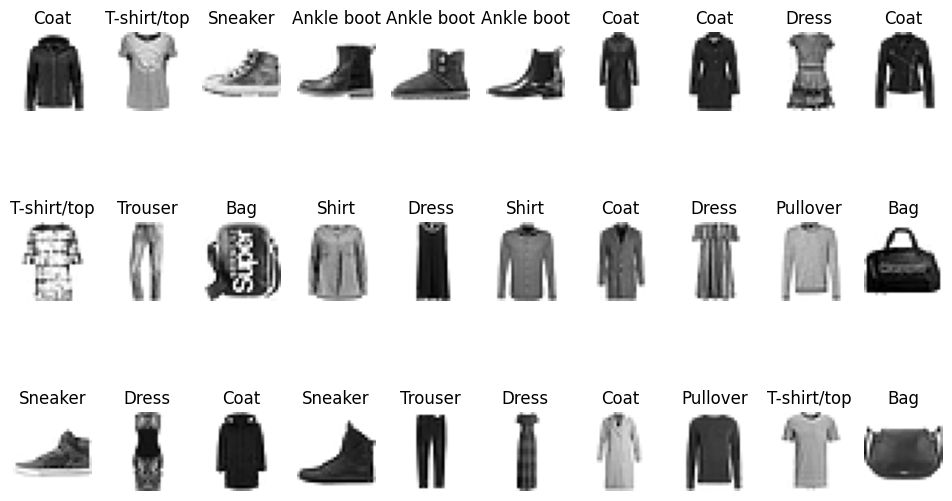

In [3]:
# 몇 개의 Sample을 그려보자
def draw_few_plot(n_row,n_col):
    plt.figure(figsize=(12,7))
    for row in range(n_row):
        for col in range(n_col):
            idx = n_col*row +col #인덱스를 이렇게 처리하는 과정이 중요함
            plt.subplot(n_row, n_col, idx+1)
            plt.imshow(X_train[idx], cmap="binary")
            plt.title(class_names[y_train[idx]])
            plt.axis("off")

draw_few_plot(3,10)

In [4]:
# 아래의 model을 계속 실행시키면 sequential 1, 2 ... 이런식으로 계속 모델을 덮어 씌우는 것 같다
## 하지만, clear_session을 주면 뒤에 숫자가 붙지 않는다!
tf.keras.backend.clear_session()

**손실(loss)**

    1. 배타적인 클래스(0,1,2,3...) : sparse_categorical_crossentropy

    2. 클래스가 원 핫 형태인 경우 : categorical_crossentropy
 
    3. 이진 분류인 경우 : binary_crossentropy (출력층은 sigmoid를 사용) 

In [5]:
# 신경망 만들기 (시퀀셜 API 사용)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
#배타적인 다중 class 분류라서 softmax 활성화 함수를 줘야 한다

# 모델을 만들었으면, 컴파일해야 한다
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 훈련은 fit 메서드를 호출한다 (싸이킷런과 다르게, fit은 history로 받아준다)
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid)) # Valid_data는 옵션이다

# validation_data대신에, validation_split=0.1도 가능하다 (검증 set이 없는 경우)

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7119 - accuracy: 0.7675 - val_loss: 0.5020 - val_accuracy: 0.8288
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4879 - accuracy: 0.8301 - val_loss: 0.4474 - val_accuracy: 0.8500
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4437 - accuracy: 0.8447 - val_loss: 0.4205 - val_accuracy: 0.8582
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4166 - accuracy: 0.8531 - val_loss: 0.4052 - val_accuracy: 0.8586
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3971 - accuracy: 0.8604 - val_loss: 0.3839 - val_accuracy: 0.8662
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3800 - accuracy: 0.8650 - val_loss: 0.3770 - val_accuracy: 0.8720
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3666 - accuracy: 0.8712 - val_loss: 0.3698 - val_accuracy:

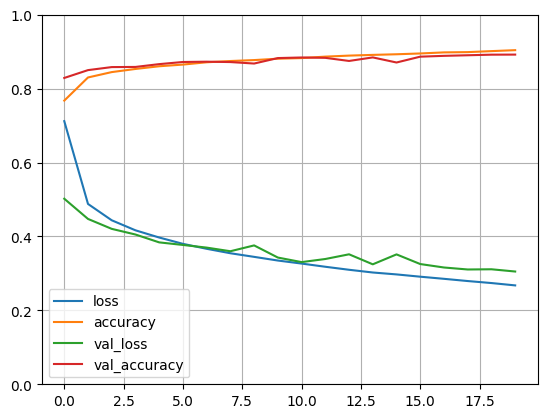

In [13]:
# 학습곡선 그려보기
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1); # 검증곡선은 에포크의 절반만큼 오른쪽으로 옮겨서 생각해야한다

In [14]:
# 모델의 layer를 출력 -> 이걸 반복문 돌려서 trainable=False 등을 지정할 수 있다
model.layers

In [15]:
# get_weights 로 파라미터에 접근 / set_weights로 파라미터 셋팅 가능
hidden1 = model.layers[1] # 첫번째 은닉층 선택

weights, biases = hidden1.get_weights()
weights[:5]

array([[-4.0754400e-02, -4.6806839e-05,  6.0137317e-02, ...,
        -3.4668811e-02, -3.3132914e-02, -7.8885863e-03],
       [-4.4156067e-02,  4.6628918e-02, -6.1162952e-02, ...,
         3.8176831e-02,  5.3066857e-02, -2.2246527e-02],
       [ 1.4762059e-02,  3.2527912e-02,  4.8660234e-02, ...,
        -2.4661547e-02, -2.6332539e-02, -2.4031522e-02],
       [-2.9840739e-02,  4.7244329e-02,  3.2046933e-02, ...,
        -5.2862819e-02, -7.0368215e-02,  7.1759485e-02],
       [ 7.0267230e-02,  1.5139800e-02,  2.1146296e-02, ...,
        -4.6740294e-02,  1.2584953e-02,  3.9462507e-02]], dtype=float32)

In [16]:
# 모델 평가
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8784


[0.33787208795547485, 0.8784000277519226]

In [17]:
# 모델 예측 (각 클래스별 확률을 리턴한다)
y_predict = model.predict(X_test[:3])
y_predict.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [18]:
# 클래스를 예측
np.argmax(model.predict(X_test[:3]), axis=-1)

array([9, 2, 1], dtype=int64)

### Regressor

출력층: 활성화 함수가 없는 하나의 뉴런(하나의 값을 예측해서)

손실함수: MSE를 사용

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [5]:
X_train.shape[1:]

(8,)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0570 - val_loss: 8.6193
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5744 - val_loss: 2.3712
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4484 - val_loss: 0.4011
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4119 - val_loss: 0.3891
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3996 - val_loss: 0.3873
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3927 - val_loss: 0.3958
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3857 - val_loss: 0.3991
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3824 - val_loss: 0.3965
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3777 - val_loss: 0.3977
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3755 - val_loss: 0.3946

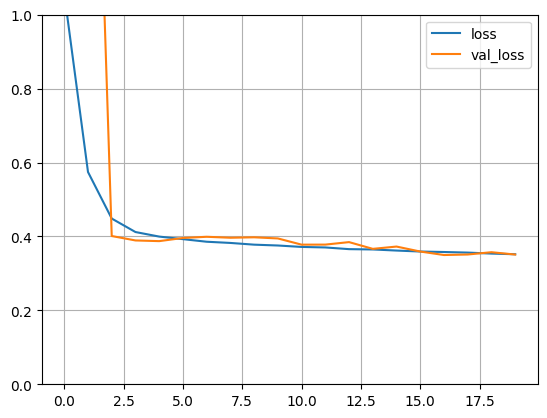

In [11]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),  # input_shape를 (8,)로 주어주는 군... 그냥 8은 안되나?
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1);

# 함수형 API 모델

Sequential 모델보다 좀 더 복잡한 모형을 만들 수 있다

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 5.0370 - val_loss: 5.2270
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 3.5343 - val_loss: 2.8341
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 2.5431 - val_loss: 2.5195
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 1.8957 - val_loss: 2.6759
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 1.4854 - val_loss: 2.6019
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 1.2314 - val_loss: 2.3184
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 1.0731 - val_loss: 1.9657
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.9729 - val_loss: 1.6114
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.9071 - val_loss: 1.3248
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.8620 - val_loss: 1.1073

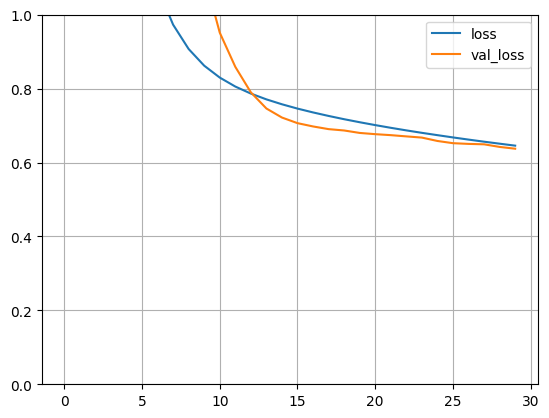

In [15]:
keras.backend.clear_session()

# Wide & Deep 신경망
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

# 검증 오차가 NaN으로 발산했는데, 학습률을 낮추는 잘되는 군
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.0001))

history = model.fit(X_train,y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1);

입력과 출력을 여러개 받는 경우

In [16]:
# 데이터 나누기 (입력을 두개 쓸거라서)
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.2003 - main_output_loss: 2.1419 - aux_output_loss: 1.0957 - val_loss: 3.3074 - val_main_output_loss: 1.6549 - val_aux_output_loss: 3.4910
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6486 - main_output_loss: 0.6234 - aux_output_loss: 0.6514 - val_loss: 4.4877 - val_main_output_loss: 0.8627 - val_aux_output_loss: 4.8905
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5825 - main_output_loss: 0.5108 - aux_output_loss: 0.5904 - val_loss: 0.6435 - val_main_output_loss: 0.9300 - val_aux_output_loss: 0.6117
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5305 - main_output_loss: 0.4790 - aux_output_loss: 0.5362 - val_loss: 0.5518 - val_main_output_loss: 0.7665 - val_aux_output_loss: 0.5280
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5052 - main_output_loss: 0.4594 - aux_output_loss: 0.5103 - val_loss

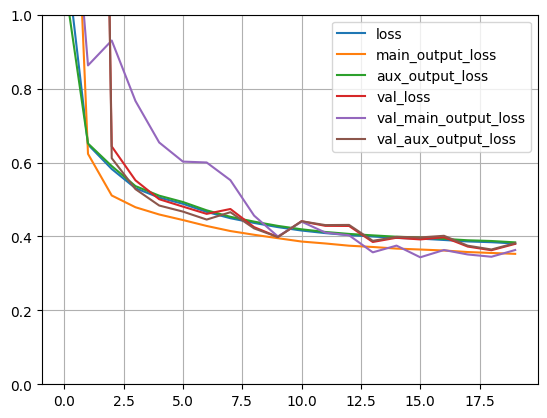

In [19]:
keras.backend.clear_session()

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

# 출력이 두개라서, loss도 두개를 준다 (각 loss의 weight 설정가능)
model.compile(loss=["mse","mse"], loss_weights=[0.1,0.9], optimizer="sgd")

# 검증데이터도 맞춰서 줘야한다
history = model.fit([X_train_A,X_train_B], 
                    [y_train,y_train], epochs=20, validation_data=([X_valid_A,X_valid_B], [y_valid, y_valid]))


pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1);

# Subclassing API 모델

반복문, 조건문 등을 포함한 복잡한 모델은 서브클래스 API로 동적 모델을 만들어야 한다

복잡하고 케라스가 잘 알아듣지 못한다는 단점이 있다

In [20]:
keras.backend.clear_session()

Epoch 1/20
363/363 [==============================] - 2s 6ms/step - loss: 1.2550 - output_1_loss: 1.6527 - output_2_loss: 1.2108 - val_loss: 7.2144 - val_output_1_loss: 32.2118 - val_output_2_loss: 4.4369
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7585 - output_1_loss: 0.8538 - output_2_loss: 0.7479 - val_loss: 1.5665 - val_output_1_loss: 6.6440 - val_output_2_loss: 1.0023
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5274 - output_1_loss: 0.5352 - output_2_loss: 0.5266 - val_loss: 4.1702 - val_output_1_loss: 6.3191 - val_output_2_loss: 3.9314
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5840 - output_1_loss: 0.5240 - output_2_loss: 0.5907 - val_loss: 0.5980 - val_output_1_loss: 0.4446 - val_output_2_loss: 0.6150
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4903 - output_1_loss: 0.4494 - output_2_loss: 0.4949 - val_loss: 0.9135 - val_output_1_loss: 0.4969 - val_o

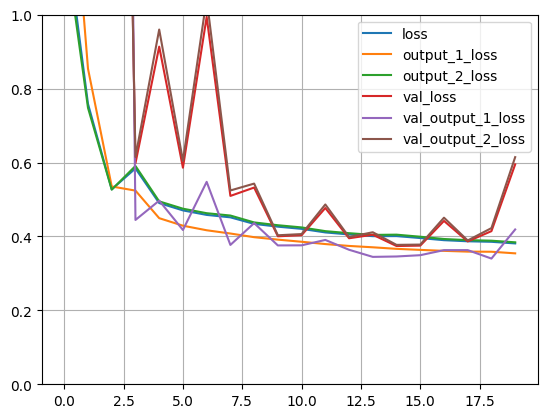

In [22]:
class WideAndDeepModel(keras.Model): # 모델 클래스를 상속
    # init에서 모델을 구성한다 / Input 층을 만들지 않고, call 매서드에 input을 준다
    def __init__(self, units=30, activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs): # call 메서드 안에 수행할 연산을 기술한다
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


model = WideAndDeepModel()
# 출력이 두개라서, loss도 두개를 준다 (각 loss의 weight 설정가능)
model.compile(loss=["mse","mse"], loss_weights=[0.1,0.9], optimizer="sgd")

# 검증데이터도 맞춰서 줘야한다
history = model.fit([X_train_A,X_train_B], 
                    [y_train,y_train], epochs=20, validation_data=([X_valid_A,X_valid_B], [y_valid, y_valid]))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1);

# 모델 저장과 복원

서브클래스 모형은 저장 불가능

In [24]:
keras.backend.clear_session()

In [25]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid))

# 쉽게 저장할 수 있다!!
model.save("my_keras_model.h5")

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.7240 - val_loss: 8.9923
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5328 - val_loss: 2.0762
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4524 - val_loss: 0.4086
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4198 - val_loss: 0.3997
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4089 - val_loss: 0.3932
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3991 - val_loss: 0.3811
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3908 - val_loss: 0.3751
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3867 - val_loss: 0.3853
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3828 - val_loss: 0.3841
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3776 - val_loss: 0.3803

In [26]:
# 불러오기
model = keras.models.load_model("my_keras_model.h5")

# Callback 사용하기

fit() 메서드에서 callbacks 매개변수를 사용해서 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있다


* ModelCheckpoint : 훈련하는 동안 일정한 간격으로 모델을 저장

* EarlyStopping : 일정 에포크 동안 검증 세트 점수가 향상되지 않으면 훈련을 중짐

In [28]:
keras.backend.clear_session()

In [27]:
# 체크포인트 콜백 사용
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="sgd")

# 콜백객체를 만들어야한다 (지정한 이름으로 중간중간 모형을 저장한다)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_best_model.h5",
                                                save_best_only=True) # 최상의 검증셋트 점수 모형만 저장

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

# 이후 최상의 모델로 복원
model = keras.models.load_model("my_best_model.h5") 

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9524 - val_loss: 9.6191
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4842 - val_loss: 0.6250
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4208 - val_loss: 0.4502
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3980 - val_loss: 0.4236
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3881 - val_loss: 0.4217
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3813 - val_loss: 0.4316
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3776 - val_loss: 0.4095
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3716 - val_loss: 0.3990
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3700 - val_loss: 0.4236
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3683 - val_loss: 0.3851

In [31]:
keras.backend.clear_session()

In [32]:
# 얼리스타핑 콜백 사용
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, # 5번동안 검증 점수 향상 X시 스탑
                                                  restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, # 조기종료를 줬기 때문에, epochs를 크게 가져갈 수 있다
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3496 - val_loss: 0.3900
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3503 - val_loss: 0.3742
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3493 - val_loss: 0.3745
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3448 - val_loss: 0.3740
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3442 - val_loss: 0.3639
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3437 - val_loss: 0.3599
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3421 - val_loss: 0.3602
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3408 - val_loss: 0.3603
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3396 - val_loss: 0.3625
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3398 - val_lo

# TensorBoard 사용

텐서보드 콜백을 만들어야 한다

In [44]:
keras.backend.clear_session()

In [45]:
# 텐서보드 로그를 저장할 폴더를 만들어야한다
import os

root_logdir = os.path.join(os.curdir, "my_logs")
root_logdir

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_02_07-15_17_16'

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 텐서보드 콜백 생성
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb, checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.1804 - val_loss: 1.6483
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8673 - val_loss: 0.7803
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7668 - val_loss: 0.7296
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7157 - val_loss: 0.6644
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6730 - val_loss: 0.6495
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6393 - val_loss: 0.6203
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6085 - val_loss: 0.6730
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5839 - val_loss: 0.5446
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5596 - val_loss: 0.5191
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5378 - val_loss: 0.5463

$ tensorboard --logdir=./my_logs --port=6006

먼저 실행 (아나콘다 터미널에서)

In [49]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 11304), started 0:02:16 ago. (Use '!kill 11304' to kill it.)

# Keras -> Scikit-learn

Wrapper로 감싸면 싸이컷런으로 쓸 수 있다 -> Gridsearch 등 가능

In [50]:
keras.backend.clear_session()

In [52]:
# 모형을 함수로 감싸야한다
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

# 이후 Model을 감싼다
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=5)])

# 최종모델은 싸이킷런과 동일하게 쓸 수 있다. Grid-Search 등이 가능하다

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0163 - val_loss: 2.6630
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6122 - val_loss: 1.7857
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5242 - val_loss: 0.6156
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4830 - val_loss: 0.6218
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4563 - val_loss: 0.4148
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4403 - val_loss: 0.4594
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4284 - val_loss: 0.3910
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4202 - val_loss: 0.4160
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4119 - val_loss: 0.3783
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4064 - val_lo